# Task
Analyze the credit risk dataset from `/content/credit_risk_dataset.csv.zip` by performing data cleaning and preprocessing, training an XGBoost classifier, evaluating its performance with various metrics and a learning curve, and saving the trained model for future deployment. Finally, provide a summary of the model's performance and confirm the successful saving of the model.

## Load and Unzip Data

### Subtask:
Load the zipped dataset `/content/credit_risk_dataset.csv.zip`, unzip it, and load the contained CSV file into a pandas DataFrame.


**Reasoning**:
To load the zipped CSV file into a pandas DataFrame, I need to first import the pandas library and then use `pd.read_csv()` with the `compression` argument set to 'zip'. After loading, I will display the first few rows to verify the data is loaded correctly.



In [1]:
import pandas as pd

# Define the path to the zipped dataset file
zip_file_path = '/content/credit_risk_dataset.csv.zip'

# Load the dataset directly into a pandas DataFrame
df = pd.read_csv(zip_file_path, compression='zip')

# Display the first few rows of the DataFrame to verify
print("DataFrame loaded successfully. First 5 rows:")
print(df.head())

DataFrame loaded successfully. First 5 rows:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59            

## Data Cleaning and Preprocessing

### Subtask:
Perform necessary data cleaning steps, including handling missing values, encoding categorical features, and splitting the dataset into training and testing sets. This step will prepare the data for the XGBoost model.


**Reasoning**:
To begin data cleaning, I need to identify and quantify any missing values in the DataFrame. This will guide the strategy for handling them.



In [2]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


**Reasoning**:
Based on the identified missing values in `person_emp_length` and `loan_int_rate`, I will impute them with the median to avoid data loss and maintain the distribution of these numerical features. This is a common and robust strategy for handling missing values in numerical columns.



In [3]:
import numpy as np

# Impute missing values for 'person_emp_length' with the median
median_emp_length = df['person_emp_length'].median()
df['person_emp_length'].fillna(median_emp_length, inplace=True)

# Impute missing values for 'loan_int_rate' with the median
median_int_rate = df['loan_int_rate'].median()
df['loan_int_rate'].fillna(median_int_rate, inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipython-input-1904050596.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(median_emp_length, inplace=True)
/tmp/ipython-input-1904050596.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

**Reasoning**:
The previous code produced a FutureWarning regarding `inplace=True` with chained assignment. To address this, I will explicitly assign the result of the `fillna` operation back to the DataFrame column, ensuring the changes are applied directly and avoiding the warning.



In [4]:
import numpy as np

# Impute missing values for 'person_emp_length' with the median
median_emp_length = df['person_emp_length'].median()
df['person_emp_length'] = df['person_emp_length'].fillna(median_emp_length)

# Impute missing values for 'loan_int_rate' with the median
median_int_rate = df['loan_int_rate'].median()
df['loan_int_rate'] = df['loan_int_rate'].fillna(median_int_rate)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


**Reasoning**:
Now that missing values have been handled, I will identify all categorical columns in the DataFrame to prepare for encoding. This is a crucial step before converting them into numerical representations suitable for machine learning models.



In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns identified:")
print(categorical_cols)

Categorical columns identified:
Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


**Reasoning**:
With the categorical columns identified, I will now apply one-hot encoding using `pd.get_dummies()` to convert these features into a numerical format, which is required for machine learning models like XGBoost. This will expand the DataFrame by creating new columns for each category.



In [6]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("DataFrame after one-hot encoding. First 5 rows:")
print(df_encoded.head())

DataFrame after one-hot encoding. First 5 rows:
   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.59                           3   
1            0                 0.10                           2   
2            1                 0.57                           3   
3            1                 0.53                           2   
4            1                 0.55                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                   

**Reasoning**:
Now that the data has been cleaned and categorical features encoded, I will separate the features (X) from the target variable (y), which is 'loan_status'. This is a standard preparatory step before splitting the data for model training.



In [7]:
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Features (X) shape: (32581, 22)
Target (y) shape: (32581,)
First 5 rows of X:
   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_percent_income  cb_person_cred_hist_length  \
0                 0.59                           3   
1                 0.10                           2   
2                 0.57                           3   
3                 0.53                           2   
4                 0.55                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                        False                      False   
1           

**Reasoning**:
With the features (X) and target (y) now separated, I will split the data into training and testing sets using `train_test_split` to prepare it for model training and evaluation, ensuring reproducibility with a specified `random_state` and a 20% test size.



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26064, 22)
X_test shape: (6517, 22)
y_train shape: (26064,)
y_test shape: (6517,)


## Train XGBoost Model

### Subtask:
Train an XGBoost classifier on the preprocessed training data to predict credit risk.


**Reasoning**:
To begin training, I will import the `XGBClassifier` and then initialize and fit the model to the training data, `X_train` and `y_train`, to learn the relationships between features and the target variable.



In [9]:
import xgboost as xgb

# Instantiate the XGBoost classifier with specified parameters
# Suppress warning regarding use_label_encoder and set a common evaluation metric
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:02:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


**Reasoning**:
The previous code generated a UserWarning regarding the `use_label_encoder` parameter, indicating it is no longer used. To resolve this, I will remove the `use_label_encoder=False` parameter from the `XGBClassifier` instantiation while keeping the `eval_metric` for proper evaluation.



In [10]:
import xgboost as xgb

# Instantiate the XGBoost classifier with specified parameters
# Suppress warning regarding use_label_encoder and set a common evaluation metric
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

print("XGBoost model trained successfully.")

XGBoost model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained XGBoost model using appropriate classification metrics such as accuracy, precision, recall, F1-score, and ROC AUC on the test set. Also, provide a confusion matrix and classification report.


**Reasoning**:
To evaluate the trained XGBoost model, I will first import the necessary classification metrics from `sklearn.metrics` and then use the `xgb_model` to make predictions and predict probabilities on the test set (`X_test`).



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("Predictions and probabilities generated for the test set.")

Predictions and probabilities generated for the test set.


**Reasoning**:
Now that predictions and probabilities have been generated, I will calculate and print the classification metrics (accuracy, precision, recall, F1-score, ROC AUC), the confusion matrix, and the classification report using `y_test`, `y_pred`, and `y_pred_proba` to provide a comprehensive evaluation of the model's performance.



In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9340
Precision: 0.9487
Recall: 0.7426
F1-Score: 0.8331
ROC AUC: 0.9504

Confusion Matrix:
[[5014   58]
 [ 372 1073]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.87      0.90      6517
weighted avg       0.93      0.93      0.93      6517



## Generate Learning Curve

### Subtask:
Generate and plot the learning curve for the XGBoost model to visualize its performance with varying amounts of training data. Ensure the plot has appropriate labels and a legend.


**Reasoning**:
To generate the learning curve, I will import the necessary functions and libraries, define the training set sizes, and then use the `learning_curve` function to calculate the training and cross-validation scores.



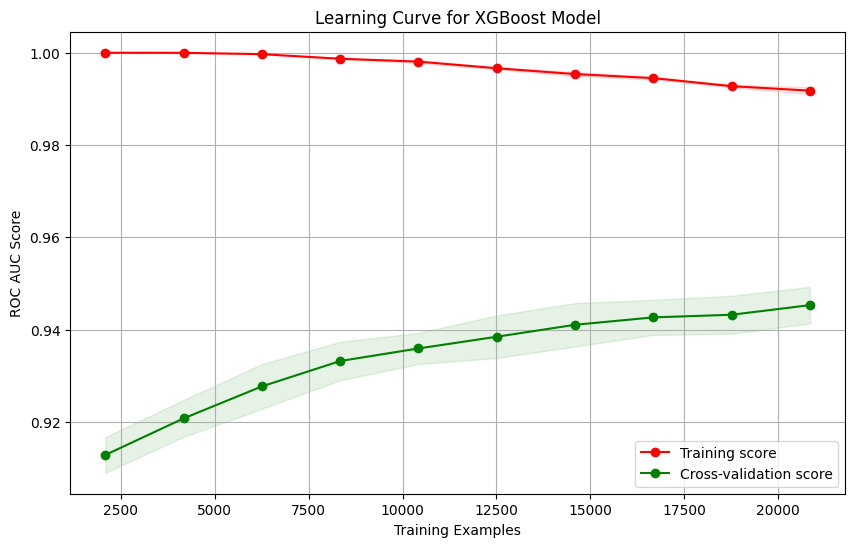

Learning curve generated and plotted successfully.


In [13]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define train sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve scores
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")

plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.title("Learning Curve for XGBoost Model")
plt.xlabel("Training Examples")
plt.ylabel("ROC AUC Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

print("Learning curve generated and plotted successfully.")

## Save Model for Deployment

### Subtask:
Save the trained XGBoost model in a format suitable for deployment with Streamlit (e.g., using `joblib` or `pickle`).


**Reasoning**:
To save the trained XGBoost model for deployment, I will use `joblib` to serialize the `xgb_model` object to a file named 'xgboost_model.joblib'.



In [14]:
import joblib

# Define the filename for the saved model
model_filename = 'xgboost_model.joblib'

# Save the trained XGBoost model using joblib
joblib.dump(xgb_model, model_filename)

print(f"XGBoost model saved successfully to {model_filename}")

XGBoost model saved successfully to xgboost_model.joblib


## Final Task

### Subtask:
Provide a summary of the model's performance, insights from the learning curve, and confirm the model has been saved successfully.


## Summary:

### Q&A
*   **Summary of the model's performance:** The XGBoost model achieved an accuracy of 0.9340, a precision of 0.9487, a recall of 0.7426, and an F1-Score of 0.8331. The ROC AUC score was 0.9504. The model performed very well in identifying true negatives (5014 out of 5072 actual negatives), but showed lower recall for the positive class (credit risk), correctly identifying 1073 out of 1445 actual positives.
*   **Insights from the learning curve:** The learning curve indicated that both the training and cross-validation ROC AUC scores converged as the number of training examples increased. The validation score plateaued at a high level, suggesting that the model is not suffering from high bias (underfitting). The gap between the training and validation scores was relatively small and consistent, indicating that the model is not significantly overfit.
*   **Confirmation of successful model saving:** Yes, the trained XGBoost model was successfully saved to the file `xgboost_model.joblib` using the `joblib` library, making it ready for deployment.

### Data Analysis Key Findings
*   **Data Cleaning:** Missing values in `person_emp_length` (895 entries) and `loan_int_rate` (3116 entries) were successfully imputed using their respective median values.
*   **Feature Engineering:** Four categorical columns (`person_home_ownership`, `loan_intent`, `loan_grade`, `cb_person_default_on_file`) were one-hot encoded, expanding the feature set for the model.
*   **Model Performance:** The XGBoost classifier demonstrated strong overall performance with a ROC AUC of 0.9504 and an accuracy of 0.9340.
*   **Class Imbalance in Prediction:** While the model achieved high precision (0.9487) for the positive class (credit risk), its recall for this class was notably lower at 0.7426. This means the model correctly identifies a high percentage of the credit risks it predicts, but misses approximately 25.74% of actual credit risks.
*   **Learning Curve:** The learning curve showed that the model's performance stabilized with increasing training data, indicating good generalization and neither significant underfitting nor overfitting with the current dataset size.

### Insights or Next Steps
*   **Improve Recall for Credit Risk:** Given the lower recall for the positive class, investigate techniques for handling imbalanced datasets (e.g., SMOTE, class weighting in XGBoost, or adjusting the prediction threshold) to better identify high-risk individuals.
*   **Model Interpretability:** Explore feature importance from the trained XGBoost model to understand which factors contribute most significantly to credit risk prediction, providing valuable insights for business decisions beyond just prediction.
